In [56]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [16]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.tail()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### The dataset chosen has no null values. If it did, we would have to deal with it as null values can cause problems.
### If the dataset had sany null values, then we could -
### df.dropna(inPlace=True) -> this would drop the whole row which contains null      values. which is not advisable.
### df.fillna(df.mean(), inPlace=True) -> this would replace the null values with the mean of the column. this could be done here.


In [9]:
df.duplicated().sum()


np.int64(0)

### No duplicates in the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Scores are integers, rest are objects

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
print("Categories in 'gender' variable are - ",df['gender'].unique())
print("Categories in 'race_ethinicity' variable are - ",df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable are - ",df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable are - ",df['lunch'].unique())
print("Categories in 'test preparation course' variable are - ",df['test_preparation_course'].unique())


Categories in 'gender' variable are -  ['female' 'male']
Categories in 'race_ethinicity' variable are -  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable are -  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are -  ['standard' 'free/reduced']
Categories in 'test preparation course' variable are -  ['none' 'completed']


#### No need to print unique scores, obviously


In [34]:
num_features = [fts for fts in df.columns if df[fts].dtype=='O']
cat_features = [fts for fts in df.columns if df[fts].dtype!='O']
print("The numerical features in the dataset are - ",num_features )
print("The categorical features in the dataset are - ",cat_features )

The numerical features in the dataset are -  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
The categorical features in the dataset are -  ['math_score', 'reading_score', 'writing_score']


In [37]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
df['Total score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average Score']=(df['math_score']+df['reading_score']+df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Here, for feature selection, we can drop math_score	, reading_score , writing_score and make Total Score as our dependent feature.
How to drop these columns - 
df.drop('math_score', axis=1, inplace=True)
df.drop('reading_score', axis=1, inplace=True)
df.drop('writing_score', axis=1, inplace=True)


In [53]:
read100 = df [df['reading_score']==100]['Average Score'].count()
print(read100)
write100 = df [df['writing_score']==100]['Average Score'].count()
print(write100)
math100 = df [df['math_score']==100]['Average Score'].count()
print(math100)

17
14
7


### Data Visualisation

In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average Score', ylabel='Count'>

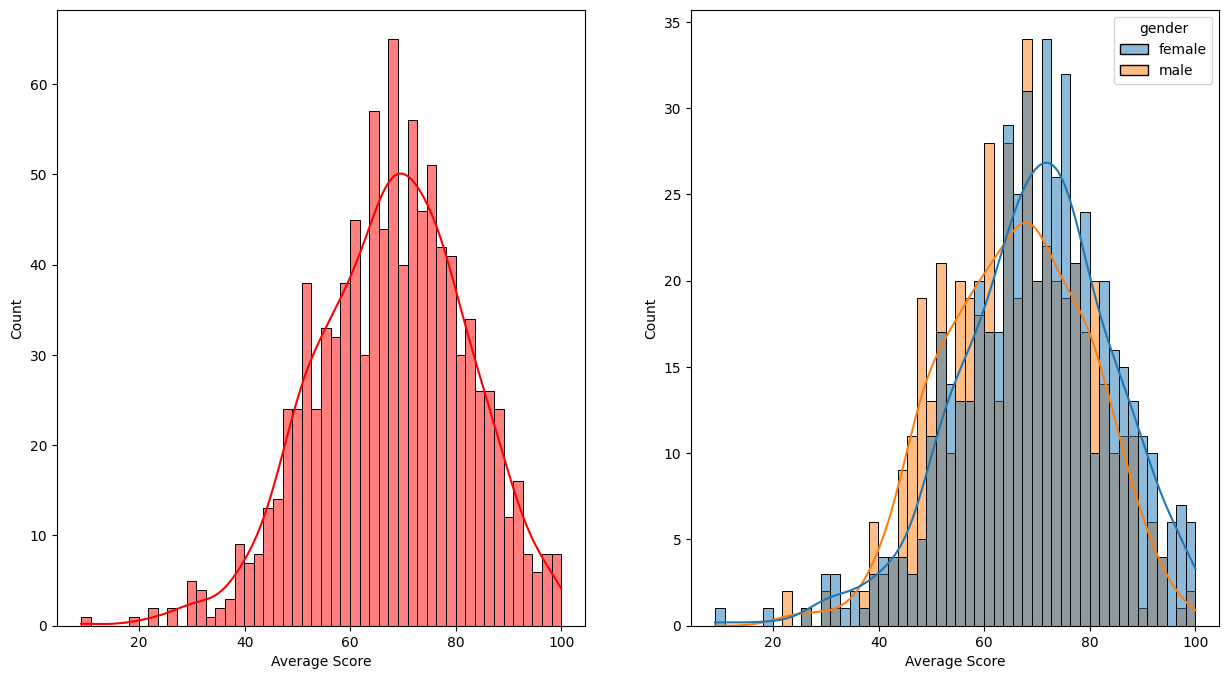

In [65]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df, x='Average Score',bins=50,kde=True,color='r')
plt.subplot(122)
sb.histplot(data=df, x='Average Score', hue = 'gender',bins=50,kde=True,color='g')

<Axes: xlabel='Total score', ylabel='Count'>

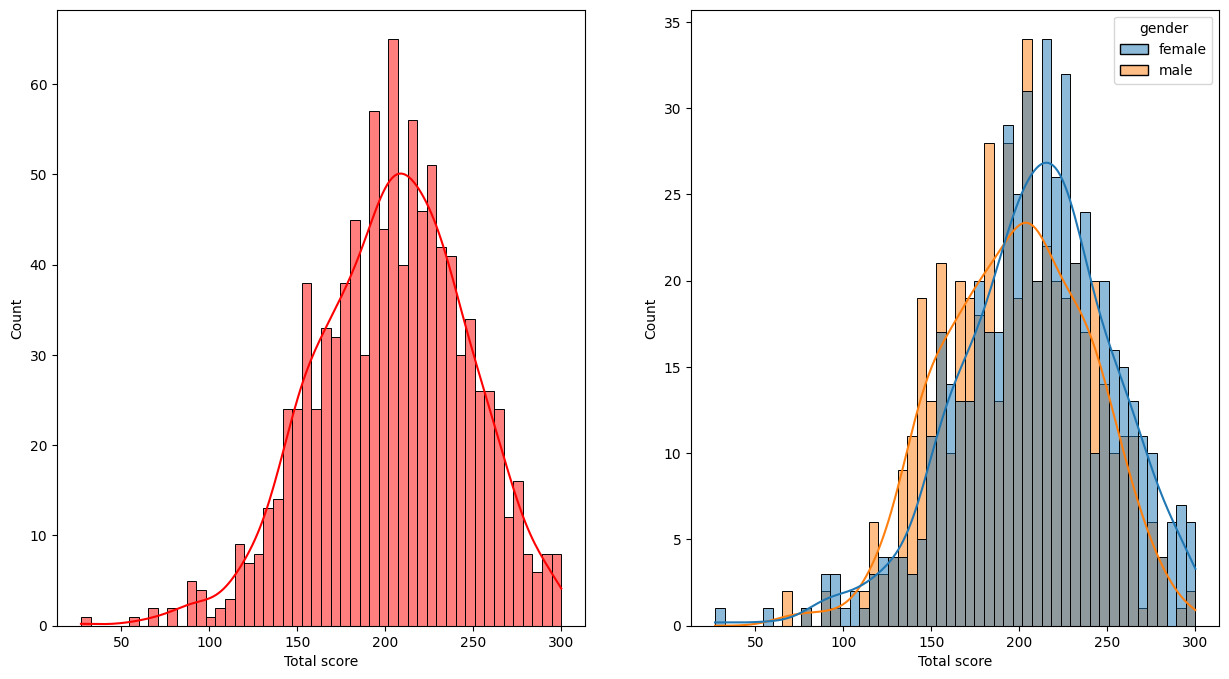

In [67]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df, x='Total score',bins=50,kde=True,color='r')
plt.subplot(122)
sb.histplot(data=df, x='Total score', hue = 'gender',bins=50,kde=True,color='g')

### Observation-
Female students are doing better than male students.


<Axes: xlabel='lunch', ylabel='Count'>

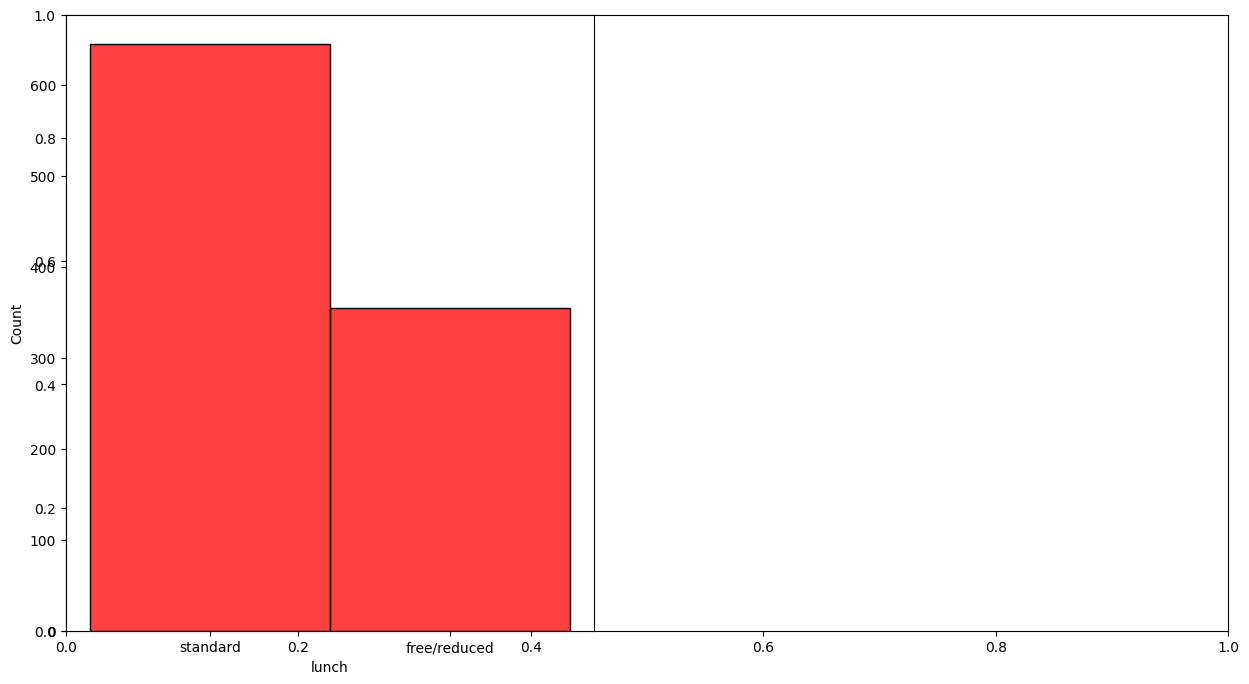

In [83]:
fig, axs = plt.subplots(1,1, figsize=(15,8))
plt.subplot(121)
sb.histplot(data=df, x='lunch',bins=0,kde=False,color='r')


### Observation- 
Standard Lunch helps students perform better in exams irrespective of the Gender

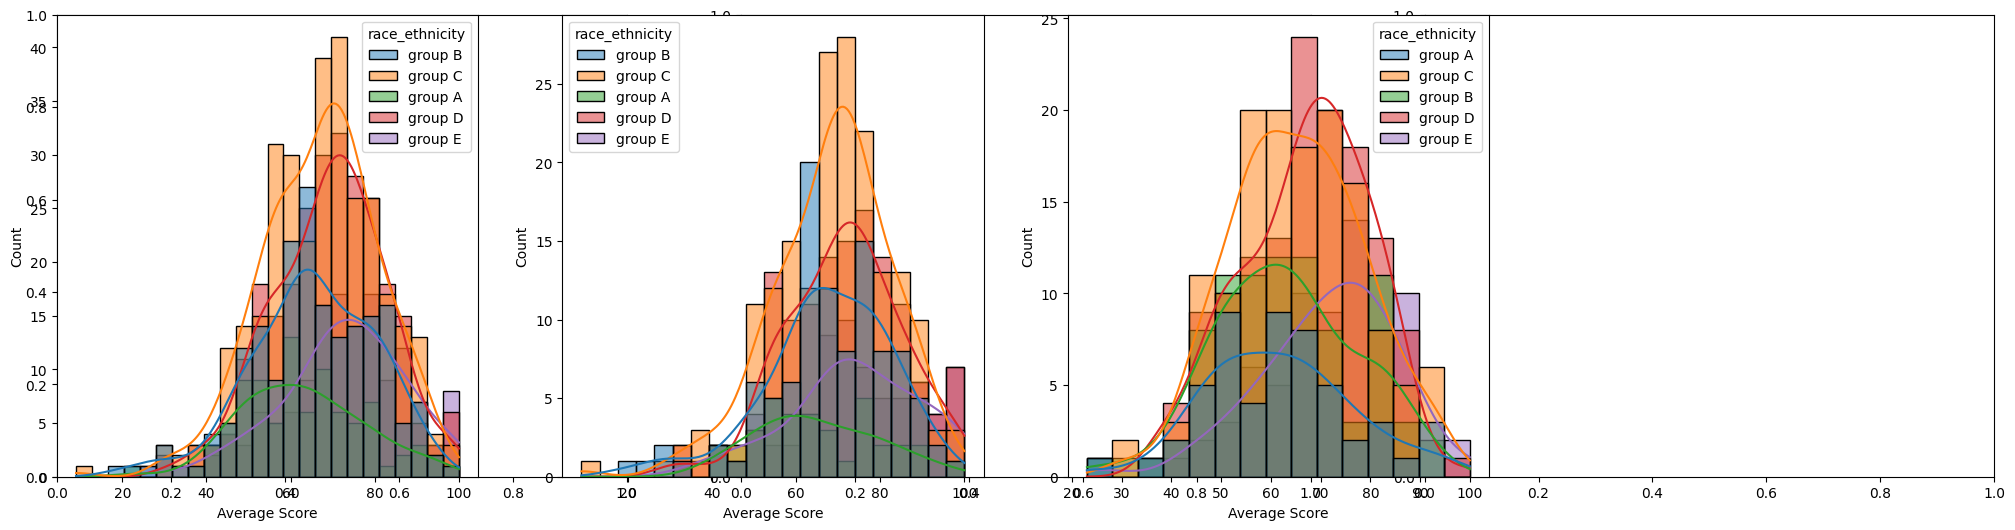

In [88]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax =sb.histplot(data=df,x= 'Average Score', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax=sb.histplot(data=df[df.gender == 'female'], x= 'Average Score', kde=True, hue='race_ethnicity')
plt.subplot(143)
ax =sb.histplot(data=df [df.gender == 'male'],x= 'Average Score', kde=True, hue='race_ethnicity')
plt.show()

### Observation-

Group C- some level of education - students have received lower grade here which means that parental education does impact student test scores

No effect of parents education on female students

In [94]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


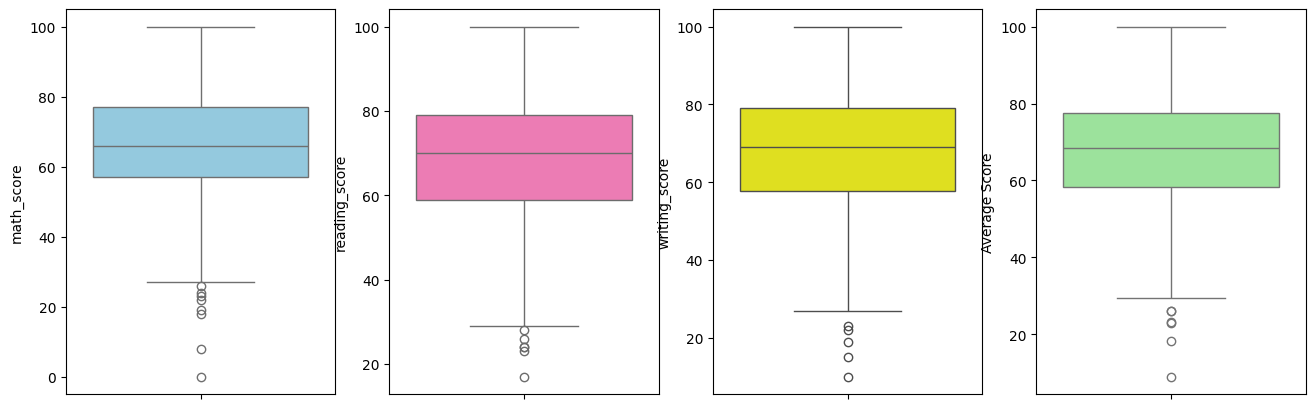

In [95]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sb.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sb.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sb.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sb.boxplot(df['Average Score'],color='lightgreen')
plt.show()

### Observation-
Outliers in math_score > outliers in reading_score> outliers in Average Score

# Final Conculsions- 
1. Performance is related with lunch, race, parental education
2. Female perform better than male irrespective of lunch, race, parental education
3. No relation was found with Preparation test scores.